# Digitale Techniken: Science Data Practice
2023-10, johanna.kerch@uni-goettingen.de, goeran.liebs@uni-goettingen.de

<img src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc-sa.png" style="height:50px" align="left"/> 

https://creativecommons.org/licenses/by-nc-sa/4.0/

## Plotting basics

Development strategy for creating a plot:

- know what you want to plot and convey as a message
- draw a sketch (by hand) which should include everything
- quick and dirty before refining
- for the refinement work you may make use of a template (from earlier work)
- consider check lists for figures (e.g. requirements for figures from journals)

https://matplotlib.org/stable/gallery/index.html<br>
https://matplotlib.org/stable/tutorials/index.html<br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xkcd.html

## Story: Is there a correlation between dust and $CO_2$ concentrations (i.e. more dust in cold periods).

In [2]:
import numpy as np    ### uuuuuuuuuuuhhh yeah some packages, modules etc.
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os
import re
from io import StringIO
import scipy as sp

In [6]:
path = os.path.join("..","data","NOAA_2021-05-06_EPICA_data","data","pub","data","paleo","icecore","antarctica","epica_domec",'*.txt')
print(path) ### o.k. nice string, haha that might be different when you look throu windows

../data/NOAA_2021-05-06_EPICA_data/data/pub/data/paleo/icecore/antarctica/epica_domec/*.txt


In [7]:
files = glob(path)
print(files) #aha a list with the file names in the folder. Screems for looping over...

['../data/NOAA_2021-05-06_EPICA_data/data/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt', '../data/NOAA_2021-05-06_EPICA_data/data/pub/data/paleo/icecore/antarctica/epica_domec/edc-co2-2008.txt', '../data/NOAA_2021-05-06_EPICA_data/data/pub/data/paleo/icecore/antarctica/epica_domec/edc-dust2008.txt', '../data/NOAA_2021-05-06_EPICA_data/data/pub/data/paleo/icecore/antarctica/epica_domec/edc-dust2008_reduced.txt', '../data/NOAA_2021-05-06_EPICA_data/data/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt']


In [8]:
# load dust record
file = files[3] #o.k. good that the collegue told me it is the third... is there a README.md file with that data? Yes!

with open(file,'r') as f: #o.k. python slang
    data2 = f.read()

print(data2)

Depth(m)     EDC3Age(kyrBP)   LaserDust(ng/g)
24.2              0.371           22.5
24.75             0.383           57.2
25.3              0.395           NaN
25.85             0.407           NaN
26.4              0.419           NaN
26.95             0.430           NaN
27.5              0.442             28
28.05             0.454           36.9
28.6              0.466           43.7
29.15             0.478             17
29.7              0.490             27
30.25             0.503           13.4
30.8              0.516           15.9
31.35             0.529           25.9
31.9              0.542           9.27
32.45             0.555           25.6
33                0.568           5.85
33.55             0.581           14.7
34.1              0.594           7.25
34.65             0.606           21.2
35.2              0.619           9.36
35.75             0.632           30.7
36.3              0.645           NaN
36.85             0.658           NaN
37.4              0.672 

['Depth(m)', 'EDC3Age(kyrBP)', 'LaserDust(ng/g)']


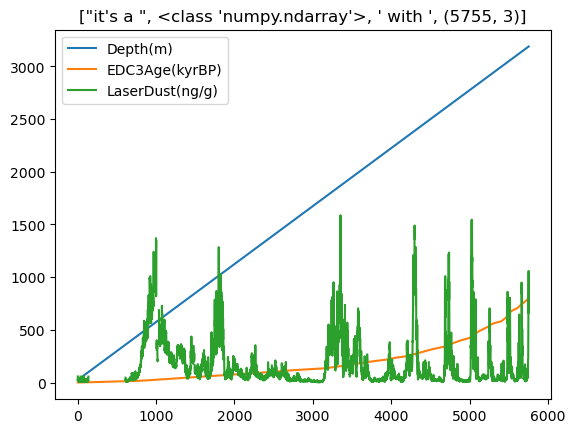

In [9]:
header = data2.split('\n')[0].split() # cut of the ... Head, R.I.P. Elisabeth
print(header)
dust_data = np.genfromtxt(StringIO(data2), delimiter = None, skip_header = 1) 

plt.plot(dust_data)
plt.title(["it\'s a ",type(dust_data)," with ", dust_data.shape])
plt.legend(header)

LaserDust (ng/g) shows some gabs. Matplotlib can not plot NaNs (not a number).
Let us get rid of NaNs with a filter.

In [16]:
#filter =  #find the lines where the third columnvalue ís equal to 25.6
filter = np.equal(dust_data[:,2],25.6)
dustspezellZahl=dust_data[filter]
print(dustspezellZahl)

[[ 32.45    0.555  25.6  ]
 [368.5    11.905  25.6  ]
 [375.65   12.205  25.6  ]]


In [18]:
dust_data_filtered = dust_data[np.logical_not(np.isnan(dust_data[:,2]))] #throw out the lines with nan in it.
#### mouse over and hid shift and tap and a window will show you infos what you moused over
print(dust_data_filtered)
years_dust = dust_data_filtered[:,0]
dust = dust_data_filtered[:,2]
years = dust_data[:,0]
carb = dust_data[:,1]

#plt.figure(figsize=(10,8))
#plt.plot(years_dust, dust, linewidth=1)

[[2.4200000e+01 3.7100000e-01 2.2500000e+01]
 [2.4750000e+01 3.8300000e-01 5.7200000e+01]
 [2.7500000e+01 4.4200000e-01 2.8000000e+01]
 ...
 [3.1878000e+03 7.9844300e+02 8.0135832e+02]
 [3.1883500e+03 7.9950100e+02 1.0584020e+03]
 [3.1889000e+03 8.0058900e+02 6.6379315e+02]]


In order to __compute correlation__
1. interpolate one or both data sets to obtain values for THE SAME set of x-values
2. use, e.g., scipy.stats.pearsonr() or .spearmanr() to compute correlation coefficients

# examine extreme x-values for both data sets

In [37]:
min(years), max(years), min(years_dust), max(years_dust), len(years), len(years_dust)

(24.2, 3188.9, 24.2, 3188.9, 5755, 5163)

Three issues: 
- not the same start and end points (but mostly overlap)
- not the same density / number of data points
- not the same units!

In [54]:
# match units to kyr
years_kyr = years/10

_Important:_ <br>when sampling a function from a data set to match another data set: sample down, not up, don't be to creative with!<br>
Dust has more values than CO2, the interpolation is thus better constrained and you can pick x-values from the function to match those of the CO2 series with higher confidence.

In [79]:
# create a interpolating function for dust

from scipy.interpolate import interp1d
spline_dust = interp1d(years_dust, dust, kind='cubic')

xnew = np.linspace(years_dust[0], years_dust[-1],len(dust))# first and last time and length for y-array 
# new timescale with regular steps, it's possible to interpolate non linear x values... 
# produce function output
yspline_dust = spline_dust(xnew)

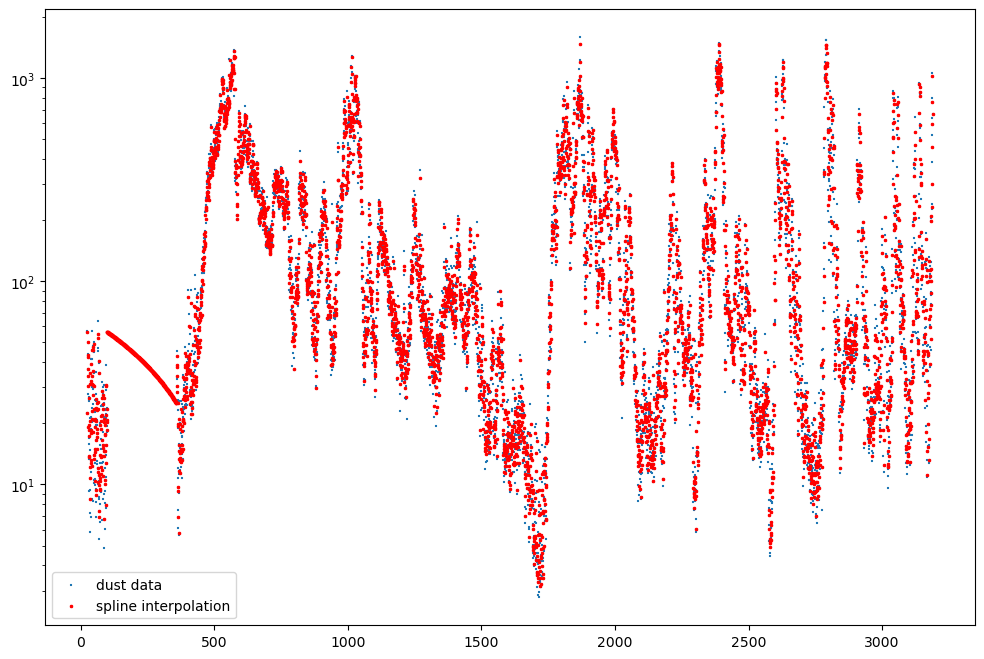

In [68]:
fig, ax1 = plt.subplots(figsize = (12,8))
plt.scatter(years_dust, dust,s=4, label="dust data", marker = '+')
plt.scatter(xnew, yspline_dust, s=3, color="red", label="spline interpolation", marker = 'x')
ax1.set_yscale('log')
plt.legend()

In fact, dust load is often displayed on a logarithmic scale.

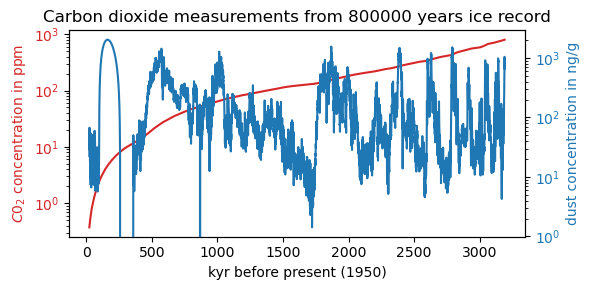

In [82]:
# plot them together with a secondary axis

fig, ax1 = plt.subplots(figsize = (6,3))

color = 'tab:red'
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(years,carb,color=color)
ax1.set_xlabel('kyr before present (1950)')
ax1.set(title = 'Carbon dioxide measurements from 800000 years ice record')
ax1.set_ylabel('$C0_{2}$ concentration in ppm', color=color)    # use LaTeX for e.g. subscript
ax1.set_yscale('log')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.plot(xnew,yspline_dust, color = color)
ax2.set_ylabel('dust concentration in ng/g', color= color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale('log')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
#ax1.set_ylim(-1000,2000)
#ax1.invert_yaxis()

## Spearman's rank correlation

Here, a linear relationship between the data sets is not likely, thus Spearman's rank correlation seems to be more appropriate.<br>
From the documentation:<br>
The Spearman rank-order correlation coefficient is a nonparametric measure
of the monotonicity of the relationship between two datasets. Unlike the
Pearson correlation, the Spearman correlation does not assume that both
datasets are normally distributed. Like other correlation coefficients,
this one varies between -1 and +1 with 0 implying no correlation.
Correlations of -1 or +1 imply an exact monotonic relationship. Positive
correlations imply that as x increases, so does y. Negative correlations
imply that as x increases, y decreases.

In [13]:
#help(sp.stats.spearmanr)

In [95]:
# compute Spearman's correlation
# better not with interpolated data? 
sp.stats.spearmanr( dust_data_filtered[:,2], dust_data_filtered[:,1]) # just the lines without NAN's

SignificanceResult(statistic=-0.2019106311663525, pvalue=1.2375126173558438e-48)

# But there musst be dependence

Again a slighly different plot...  

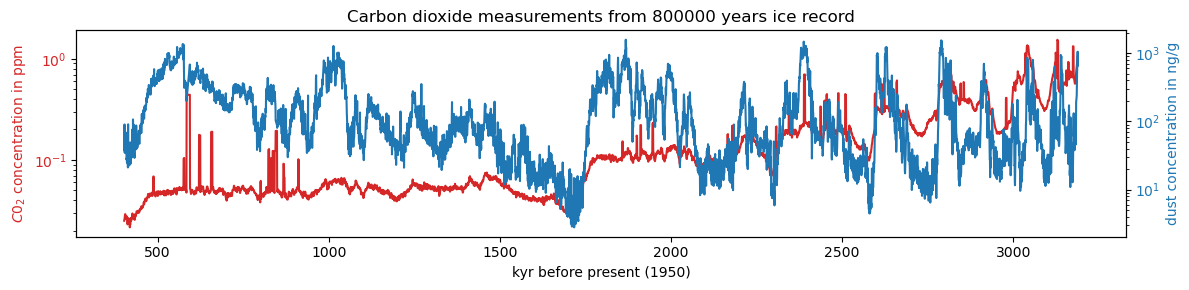

In [97]:
# plot them together with a secondary axis

fig, ax1 = plt.subplots(figsize = (12,3))

color = 'tab:red'
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(dust_data_filtered[200:,0],np.gradient(dust_data_filtered[200:,1]),color=color)
ax1.set_xlabel('kyr before present (1950)')

ax1.set(title = 'Carbon dioxide measurements from 800000 years ice record')
ax1.set_ylabel('Changes? $ C0_{2}$ concentration in ppm', color=color)    # use LaTeX for e.g. subscript
ax1.set_yscale('log')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.plot(dust_data_filtered[200:,0],dust_data_filtered[200:,2], color = color)
ax2.set_ylabel('dust concentration in ng/g', color= color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale('log')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
#ax1.set_ylim(-1000,2000)
#ax1.invert_yaxis()